In [140]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from helper_functions import *

### Preparation

In [141]:
# Read the database and eliminate the repeated index column
df = pd.read_csv("profit_x_y.csv")
df = df.drop("Unnamed: 0", axis =1)
pd.set_option("display.max_columns", None)
df

,title_x,title_y,year_x,duration_x,budget_x,LANGUAGE_English_x,LANGUAGE_Chinese_x,LANGUAGE_Korean_x,PC_Marvel Studios_x,PC_Columbia Pictures_x,PC_Universal Pictures_x,PC_Warner Bros_x,PC_Twentieth Century Fox_x,PC_Walt Disney Pictures_x,autumn_x,spring_x,summer_x,winter_x,GENRE_Action_x,GENRE_Adventure_x,GENRE_Animation_x,GENRE_Biography_x,GENRE_Comedy_x,GENRE_Crime_x,GENRE_Drama_x,GENRE_Family_x,GENRE_Fantasy_x,GENRE_Horror_x,GENRE_Mystery_x,GENRE_Other_x,GENRE_Romance_x,GENRE_Sci-Fi_x,GENRE_Thriller_x,year_y,duration_y,budget_y,LANGUAGE_English_y,LANGUAGE_Chinese_y,LANGUAGE_Korean_y,PC_Marvel Studios_y,PC_Columbia Pictures_y,PC_Universal Pictures_y,PC_Warner Bros_y,PC_Twentieth Century Fox_y,PC_Walt Disney Pictures_y,autumn_y,spring_y,summer_y,winter_y,GENRE_Action_y,GENRE_Adventure_y,GENRE_Animation_y,GENRE_Biography_y,GENRE_Comedy_y,GENRE_Crime_y,GENRE_Drama_y,GENRE_Family_y,GENRE_Fantasy_y,GENRE_Horror_y,GENRE_Mystery_y,GENRE_Other_y,GENRE_Romance_y,GENRE_Sci-Fi_y,GENRE_Thriller_y,profit_xy
0,tt0448115,tt0437086,2019,132,100000000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2019,122,170000000,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,tt0451279,tt0437086,2017,141,149000000,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,122,170000000,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,tt0451279,tt0448115,2017,141,149000000,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,132,100000000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,tt0493405,tt0437086,2017,100,25000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2019,122,170000000,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,tt0493405,tt0448115,2017,100,25000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2019,132,100000000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,tt2873282,tt2482856,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2018,81,1000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
9446,tt2873282,tt2492344,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017,93,2000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
9447,tt2873282,tt2531334,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017,89,5000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
9448,tt2873282,tt2674358,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017,91,28000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [142]:
# Delete the useless columns
df = df.drop(["title_x","title_y"],axis = 1)
pd.set_option("display.max_columns", None)
df

,year_x,duration_x,budget_x,LANGUAGE_English_x,LANGUAGE_Chinese_x,LANGUAGE_Korean_x,PC_Marvel Studios_x,PC_Columbia Pictures_x,PC_Universal Pictures_x,PC_Warner Bros_x,PC_Twentieth Century Fox_x,PC_Walt Disney Pictures_x,autumn_x,spring_x,summer_x,winter_x,GENRE_Action_x,GENRE_Adventure_x,GENRE_Animation_x,GENRE_Biography_x,GENRE_Comedy_x,GENRE_Crime_x,GENRE_Drama_x,GENRE_Family_x,GENRE_Fantasy_x,GENRE_Horror_x,GENRE_Mystery_x,GENRE_Other_x,GENRE_Romance_x,GENRE_Sci-Fi_x,GENRE_Thriller_x,year_y,duration_y,budget_y,LANGUAGE_English_y,LANGUAGE_Chinese_y,LANGUAGE_Korean_y,PC_Marvel Studios_y,PC_Columbia Pictures_y,PC_Universal Pictures_y,PC_Warner Bros_y,PC_Twentieth Century Fox_y,PC_Walt Disney Pictures_y,autumn_y,spring_y,summer_y,winter_y,GENRE_Action_y,GENRE_Adventure_y,GENRE_Animation_y,GENRE_Biography_y,GENRE_Comedy_y,GENRE_Crime_y,GENRE_Drama_y,GENRE_Family_y,GENRE_Fantasy_y,GENRE_Horror_y,GENRE_Mystery_y,GENRE_Other_y,GENRE_Romance_y,GENRE_Sci-Fi_y,GENRE_Thriller_y,profit_xy
0,2019,132,100000000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2019,122,170000000,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2017,141,149000000,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,122,170000000,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2017,141,149000000,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2019,132,100000000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2017,100,25000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2019,122,170000000,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2017,100,25000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2019,132,100000000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2018,81,1000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
9446,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017,93,2000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
9447,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017,89,5000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
9448,2018,140,69000000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017,91,28000000,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [143]:
# Set the features and target variable for the model
y = df["profit_xy"]
x = df.drop(["profit_xy"],axis = 1)

### Model define

In [144]:
# Native Bayes model which returns AUC
def native_bayes(x_train, y_train, x_test, y_test):
    classifier_nb = GaussianNB()
    classifier_nb.fit(x_train, y_train)
    y_pred_nb = classifier_nb.predict(x_test)
    y_score_nb = classifier_nb.predict_proba(x_test)
    
    fpr_nb, tpr_nb, threshold = roc_curve(y_test, y_score_nb[:, 1])
    auc_nb = auc(fpr_nb, tpr_nb)
    return auc_nb

In [145]:
# Random Forest Classifier which returns AUC
def random_forest(x_train, y_train, x_test, y_test):
    classifier_rf=RandomForestClassifier(n_estimators=100)
    classifier_rf.fit(x_train,y_train)
    y_pred_rf = classifier_rf.predict(x_test)
    y_score_rf = classifier_rf.predict_proba(x_test)
    
    fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_score_rf[:, 1])
    auc_rf = auc(fpr_rf, tpr_rf)
    return auc_rf

### Cross-Validation Building

In [146]:
# Native Bayes
def cross_validate_nb(df, num_folds = 10):
    """
    Performs K fold cross validation using native bayes model.
    Returns an array containing scores from each iteration.
    
    """
    
    # Gets the row numbers for the training folds and the validaition folds for each iteration.
    # tf_indices -> indices for training folds for each iteration
    # vf_indices -> indices for validation folds for each iteration
    tf_indices, vf_indices = get_fold_indices(df, num_folds)

    # Keeps track of the scores for each iteration of cross validation.
    cross_validation_auc_nb = []

    # Performs cross validation
    for i in range(len(tf_indices)):  
        
        # logs of budget and duration columns to help reduce skew, particularly relevant for duration. budget is highly non-normal so not a huge effect
        log_standardisation(df)

        # Training and validation data for the current iteration/
        train_fold_df = df.iloc[tf_indices[i]]
        validation_fold_df = df.iloc[vf_indices[i]]

        # X and y data for training fold
        x_train = train_fold_df.drop("profit_xy", axis = 1).to_numpy()
        y_train = train_fold_df["profit_xy"].to_numpy()

        # X and y data for validation fold
        x_test = validation_fold_df.drop("profit_xy", axis = 1).to_numpy()
        y_test = validation_fold_df["profit_xy"].to_numpy()

        # Run the model, get the prediction and get the auc
        auc_nb = native_bayes(x_train, y_train, x_test, y_test)
        cross_validation_auc_nb.append(auc_nb)


    return cross_validation_auc_nb

In [147]:
# Random Forest Classifier
def cross_validate_rf(df, num_folds = 10):
    """
    Performs K fold cross validation using native bayes model.
    Returns an array containing scores from each iteration.
    
    """
    
    # Gets the row numbers for the training folds and the validaition folds for each iteration.
    # tf_indices -> indices for training folds for each iteration
    # vf_indices -> indices for validation folds for each iteration
    tf_indices, vf_indices = get_fold_indices(df, num_folds)

    # Keeps track of the scores for each iteration of cross validation.
    cross_validation_auc_rf = []

    # Performs cross validation
    for i in range(len(tf_indices)): 
        
        # logs of budget and duration columns to help reduce skew, particularly relevant for duration. budget is highly non-normal so not a huge effect
        log_standardisation(df)

        # Training and validation data for the current iteration/
        train_fold_df = df.iloc[tf_indices[i]]
        validation_fold_df = df.iloc[vf_indices[i]]

        # X and y data for training fold
        x_train = train_fold_df.drop("profit_xy", axis = 1).to_numpy()
        y_train = train_fold_df["profit_xy"].to_numpy()

        # X and y data for validation fold
        x_test = validation_fold_df.drop("profit_xy", axis = 1).to_numpy()
        y_test = validation_fold_df["profit_xy"].to_numpy()

        # Run the model, get the prediction and get the auc
        auc_rf = random_forest(x_train, y_train, x_test, y_test)
        cross_validation_auc_rf.append(auc_rf)

    return cross_validation_auc_rf

### Cross Validation on Train Set

In [148]:
# logs of budget and duration columns to help reduce skew, particularly relevant for duration. budget is highly non-normal so not a huge effect
log_standardisation(df)

#  Split the data into train set and test set 
df_train, df_test = get_train_test_split(df, train_size = 0.8)

# Re-calculates the indices because pandas normally keeps the original indices when you take a section of a dataframe
df_train.reset_index(inplace=True, drop=True) 
df_test.reset_index(inplace=True, drop=True)

# Native Bayes
cross_validation_auc_nb = cross_validate_nb(df_train)
average_cv_auc_nb = round(100 * sum(cross_validation_auc_nb)/len(cross_validation_auc_nb),2)

print(f"Cross validation auc for Native Bayes Model = {np.around(100 * np.array(cross_validation_auc_nb),2)}")
print(f"Average cross validation auc for Native Bayes Model = {average_cv_auc_nb}")

# Random Forest
cross_validation_auc_rf = cross_validate_rf(df_train)
average_cv_auc_rf = round(100 * sum(cross_validation_auc_rf)/len(cross_validation_auc_rf),2)

print(f"Cross validation auc for Random Forest Model = {np.around(100 * np.array(cross_validation_auc_rf),2)}")
print(f"Average cross validation auc for Random Forest Model = {average_cv_auc_rf}")


Cross validation auc for Native Bayes Model = [77.34 72.62 75.68 74.73 72.01 70.57 76.34 71.65 75.13 73.92]
Average cross validation auc for Native Bayes Model = 74.0
Cross validation auc for Random Forest Model = [96.93 96.16 96.49 96.2  96.76 95.47 96.51 96.9  96.8  96.38]
Average cross validation auc for Random Forest Model = 96.46


### Evaluation on Test Set: ROC and AUC

In [149]:
# X and y data for training fold
x_train = df_train.drop("profit_xy", axis = 1).to_numpy()
y_train = df_train["profit_xy"].to_numpy()

# X and y data for test fold
x_test = df_test.drop("profit_xy", axis = 1).to_numpy()
y_test = df_test["profit_xy"].to_numpy()

## Native Bayes
# Make prediction by model
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)
y_pred_nb = classifier_nb.predict(x_test)
y_score_nb = classifier_nb.predict_proba(x_test)

# Get fpr, tpr and AUC 
# fpr -> Fale Positive Rate
# tpr -> True Positive Rate
fpr_nb, tpr_nb, threshold = roc_curve(y_test, y_score_nb[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)

## Random Forest
# Make prediction by model
classifier_rf=RandomForestClassifier(n_estimators=100)
classifier_rf.fit(x_train,y_train)
y_pred_rf = classifier_rf.predict(x_test)
y_score_rf = classifier_rf.predict_proba(x_test)

# Get fpr, tpr and AUC 
# fpr -> Fale Positive Rate
# tpr -> True Positive Rate
fpr_rf, tpr_rf, threshold = roc_curve(y_test, y_score_rf[:, 1])
auc_rf = auc(fpr_rf, tpr_rf)

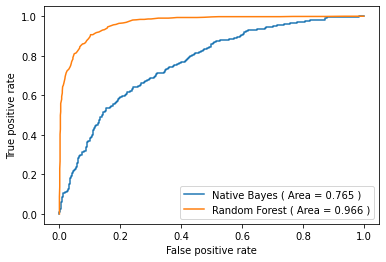

In [150]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_nb, tpr_nb, label = f"Native Bayes ( Area = {round(auc_nb,3)} )")
plt.plot(fpr_rf, tpr_rf, label = f"Random Forest ( Area = {round(auc_rf,3)} )")

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

plt.legend()
plt.show()